We will use this notebook to calculate and visualize statistics of our chess move dataset. This will allow us to better understand our limitations and help diagnose problems we may encounter down the road when training/defining our model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def get_move_freqs(string, sort=True):
    moves = string.split(' ')
    freq_dict = {}
    for move in moves:
        if move not in freq_dict:
            freq_dict[move] = 0
        freq_dict[move] = freq_dict[move] + 1
    tuples = [(w, c) for w, c in freq_dict.items()]
    if sort:
        tuples = sorted(tuples, key=lambda x: -x[1])
    return (tuples, moves)

def plot_frequency(counts, move_limit=1000):
    # limit to the n most frequent moves
    n = 1000
    counts = counts[0:n]
    # from: http://stackoverflow.com/questions/30690619/python-histogram-using-matplotlib-on-top-words
    # counts = [('test', 510), ('Hey', 362), ("please", 753), ('take', 446), ('herbert', 325), ('live', 222), ('hate', 210), ('white', 191), ('simple', 175), ('harry', 172), ('woman', 170), ('basil', 153), ('things', 129), ('think', 126), ('bye', 124), ('thing', 120), ('love', 107), ('quite', 107), ('face', 107), ('eyes', 107), ('time', 106), ('himself', 105), ('want', 105), ('good', 105), ('really', 103), ('away',100), ('did', 100), ('people', 99), ('came', 97), ('say', 97), ('cried', 95), ('looked', 94), ('tell', 92), ('look', 91), ('world', 89), ('work', 89), ('project', 88), ('room', 88), ('going', 87), ('answered', 87), ('mr', 87), ('little', 87), ('yes', 84), ('silly', 82), ('thought', 82), ('shall', 81), ('circle', 80), ('hallward', 80), ('told', 77), ('feel', 76), ('great', 74), ('art', 74), ('dear',73), ('picture', 73), ('men', 72), ('long', 71), ('young', 70), ('lady', 69), ('let', 66), ('minute', 66), ('women', 66), ('soul', 65), ('door', 64), ('hand',63), ('went', 63), ('make', 63), ('night', 62), ('asked', 61), ('old', 61), ('passed', 60), ('afraid', 60), ('night', 59), ('looking', 58), ('wonderful', 58), ('gutenberg-tm', 56), ('beauty', 55), ('sir', 55), ('table', 55), ('turned', 54), ('lips', 54), ("one's", 54), ('better', 54), ('got', 54), ('vane', 54), ('right',53), ('left', 53), ('course', 52), ('hands', 52), ('portrait', 52), ('head', 51), ("can't", 49), ('true', 49), ('house', 49), ('believe', 49), ('black', 49), ('horrible', 48), ('oh', 48), ('knew', 47), ('curious', 47), ('myself', 47)]
    moves = [x[0] for x in counts]
    values = [int(x[1]) for x in counts]
    bar = plt.bar(range(len(moves)), values, color='green', alpha=0.4)

    plt.xlabel('Move Index')
    plt.ylabel('Frequency')
    plt.title('Move Frequency Chart')

    plt.show()
    
def plot_uniq_over_count(moves, interval=0.01):
    
    xs, ys = [], []
    for i in range(0, len(moves), int(len(moves) * interval)):
        chunk = moves[0:i]
        uniq = list(set(chunk))
        xs.append(len(chunk))
        ys.append(len(uniq))
    
    plt.plot(xs, ys)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.xlabel('Moves')
    plt.ylabel('Unique Moves')
    plt.show()

Load our concatonated moves data.

with open('../data/moves.txt', 'r') as f:
    counts, moves = get_move_freqs(f.read())

## Plot Move Frequency
Here we can see which moves appear most frequently in the dataset. These moves are the most popular moves played by chess champions.

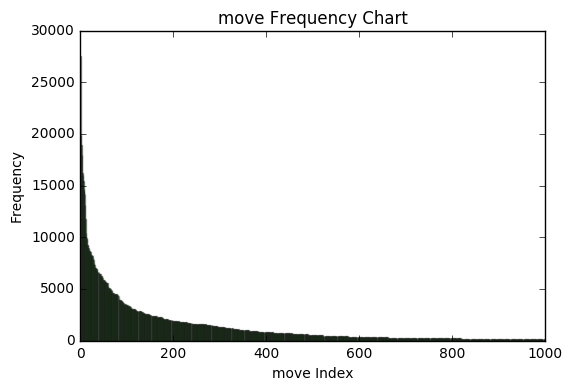

In [7]:
plot_frequency(counts)

We will list the most common few moves along with what percentage of the entire moves dataset this move represents.

In [10]:
top_n = 10
for w in counts[0:top_n]:
    print((w[0]).ljust(8), '{:.2f}%'.format((w[1]/len(moves)) * 100.00))

O-O      1.88%
Nf6      1.36%
Nf3      1.29%
d4       1.23%
e4       1.11%
Nc3      1.09%
d5       1.05%
c5       1.00%
c4       0.98%
e5       0.97%


## Plot Unique Moves
Here we compare the number of unique moves over the total move count. Take notice that the number of unique moves converges towards a constant as the number of total moves increase. This would suggest that there is a subset of all possible moves that actually make sense for a chess champion to play.

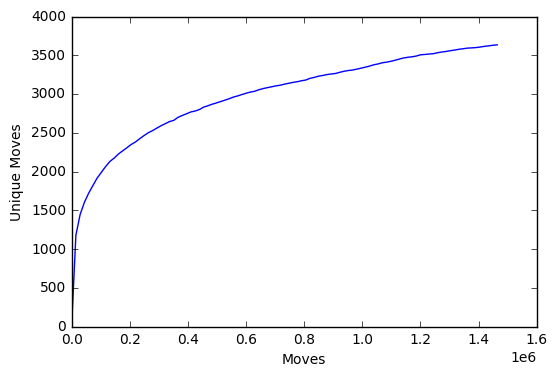

In [11]:
plot_uniq_over_count(moves)